In [13]:
#Essential Libraries import os import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
from keras.preprocessing. image import ImageDataGenerator
# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
# Callbacks
from keras.callbacks import EarlyStopping as ES, ModelCheckpoint as MC
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Activation

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Initialize generator
gen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    brightness_range=[0.3,0.8],
    validation_split=0.1
)

In [5]:
#Load Data
train_ds = gen.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Micro_Organism',  # Update this path to your dataset directory
    batch_size=128,
    shuffle=True,
    # Other arguments as needed
    class_mode='binary',
    target_size=(256,256), # This image size is generally sufficient for better image classifications.
    subset='training'
)
valid_ds = gen.flow_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/Micro_Organism',
    batch_size=64, # For faster inference, the batch size here is small.
    shuffle=True,
    class_mode='binary',
    target_size=(256,256), # This image size is generally sufficient for better image classifications.
    subset='validation'
)

Found 715 images belonging to 8 classes.
Found 75 images belonging to 8 classes.


In [6]:
# Mode1
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [7]:
root_path = '/content/drive/MyDrive/Colab Notebooks/Micro_Organism'  # Replace this with the actual path to your dataset directory


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Get class names

class_names = sorted (os.listdir(root_path))

n_classes = len(class_names)

class_names



['Amoeba',
 'Euglena',
 'Hydra',
 'Paramecium',
 'Rod_bacteria',
 'Spherical_bacteria',
 'Spiral_bacteria',
 'Yeast']

In [10]:
n_classes

8

In [11]:
class_dis = [len(os.listdir(root_path + '/' + name)) for name in class_names]
class_dis

[72, 168, 76, 153, 85, 86, 75, 75]

In [15]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.45}})
fig.show()

In [16]:
fig = px.bar(x=class_names, y=class_dis, title="Class Distribution")
fig.update_layout({'title':{'x':0.45}})
fig.show()

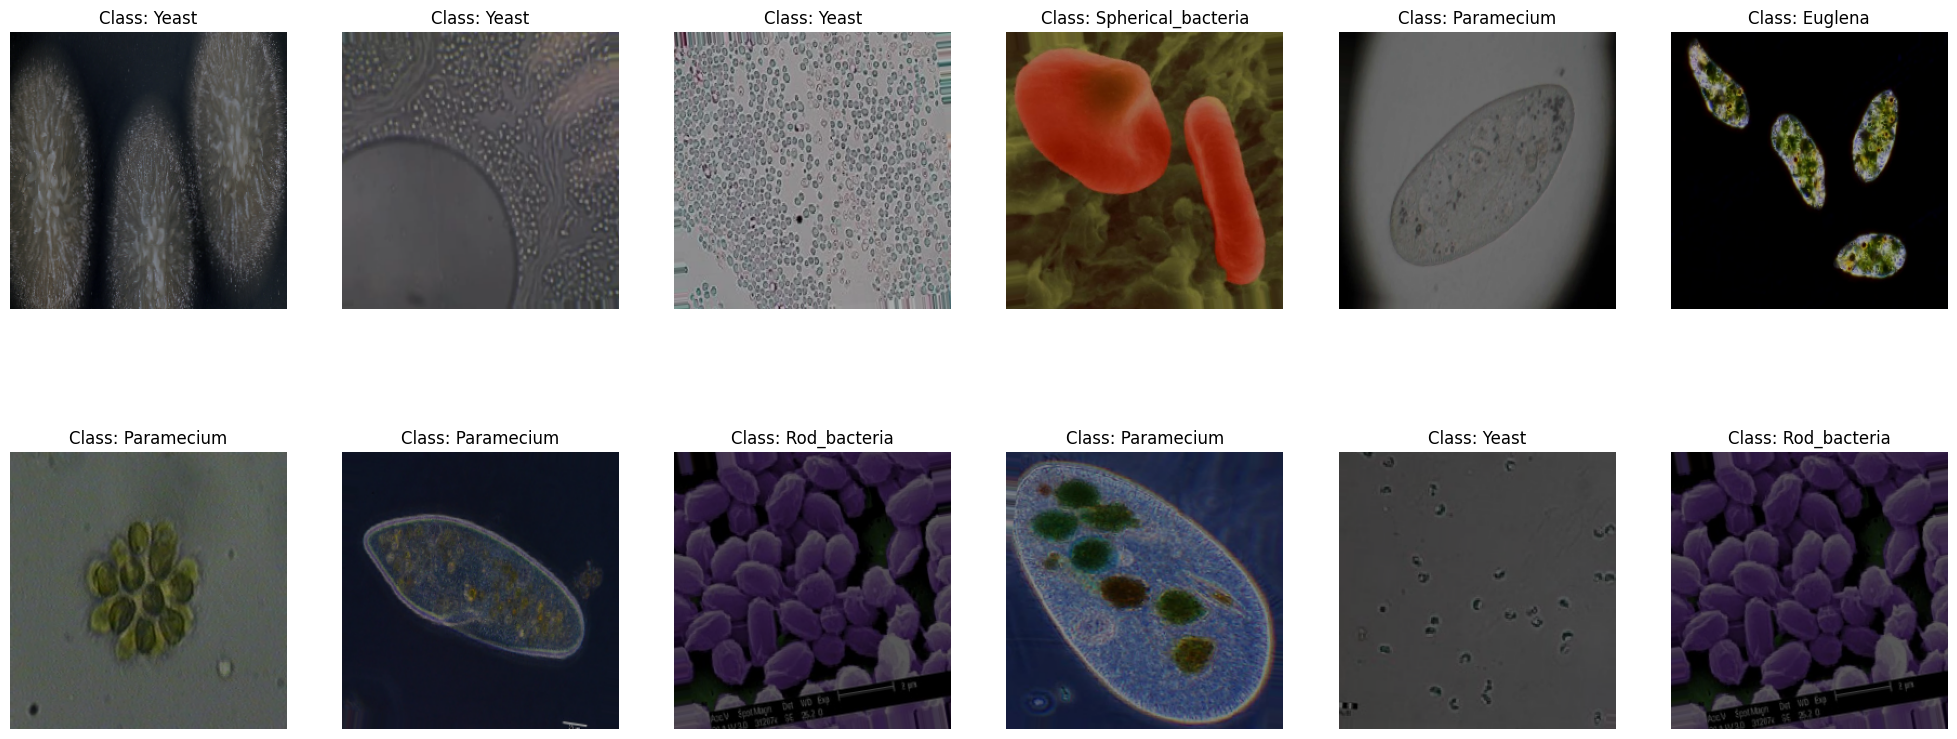

In [17]:
def show_images(data, GRID=[2, 6], model=None, size=(25, 10)):
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=size)

    # Data for visualization
    images, labels = next(iter(data))  # This process can take a little time because of the large batch size

    for i in range(1, n_rows * n_cols + 1):
        # Select a random data for each subplot
        id = np.random.randint(len(images))
        image, label = images[id], class_names[int (labels[id])]

        # Plot the subplot
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        plt.axis('off')

        # If model is available, make predictions.
        if model is not None:
            pred = class_names[np.argmax(model.predict(image[np.newaxis, ...]))]
            title = f"Class: {label}\nPred: {pred}"
        else:
            title = f"Class: {label}"

        plt.title(title)

    plt.show()

show_images(data=train_ds)

In [18]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=10))
model.add(Activation('relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Build the model
model.build((None, 10))  # Input shape (None, 10) where None represents variable batch size

# Now you can get the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from keras.models import Sequential

In [ ]:
# Give you a model, a name
from keras.applications import InceptionV3

name = "inception-v3"
# Base model
base = InceptionV3(input_shape=(256, 256, 3), include_top=False)
base.trainable = False
# Model Architecture
model = Sequential([
    base, GAP(),
    Dense(256, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation= 'softmax')
])
# Callbacks
cbs = [ES(patience=3, restore_best_weights=True), MC(name + ".h5", save_best_only=True)]

# Compile Model
opt = tf.keras.optimizers.Adam(learning_rate=1e-3) # Higher than the default learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Training
history = model.fit(train_ds, validation_data=valid_ds, epochs=15, callbacks=cbs)


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/15
4/6 [===================>..........] - ETA: 58s - loss: 2.4238 - accuracy: 0.2200 

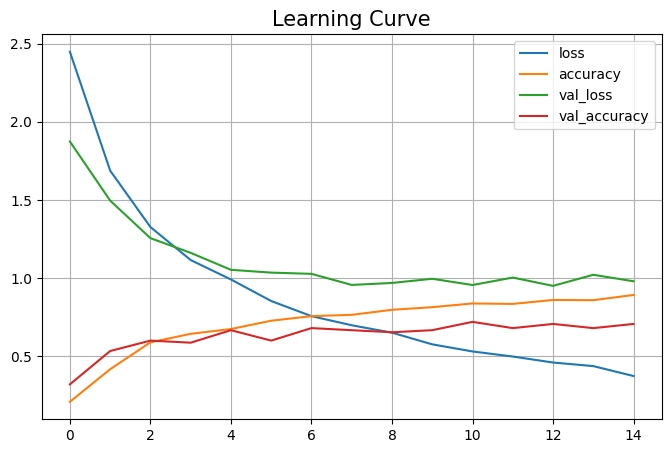

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

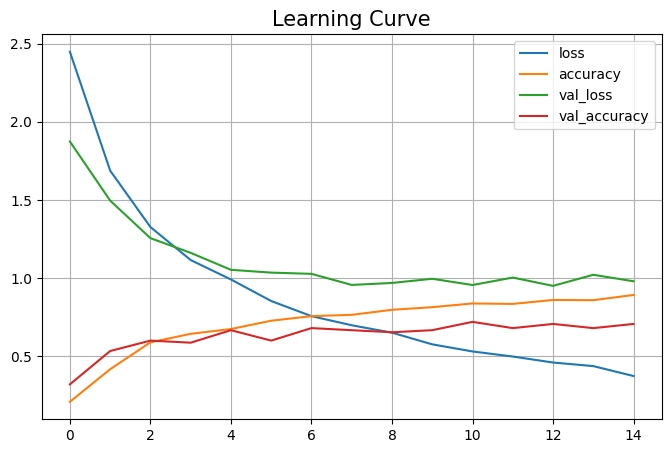

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Learning Curve", fontsize=15)
plt.grid()
plt.show()

In [ ]:
model.save('my_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1/1 [==============================] - 0s 177ms/step


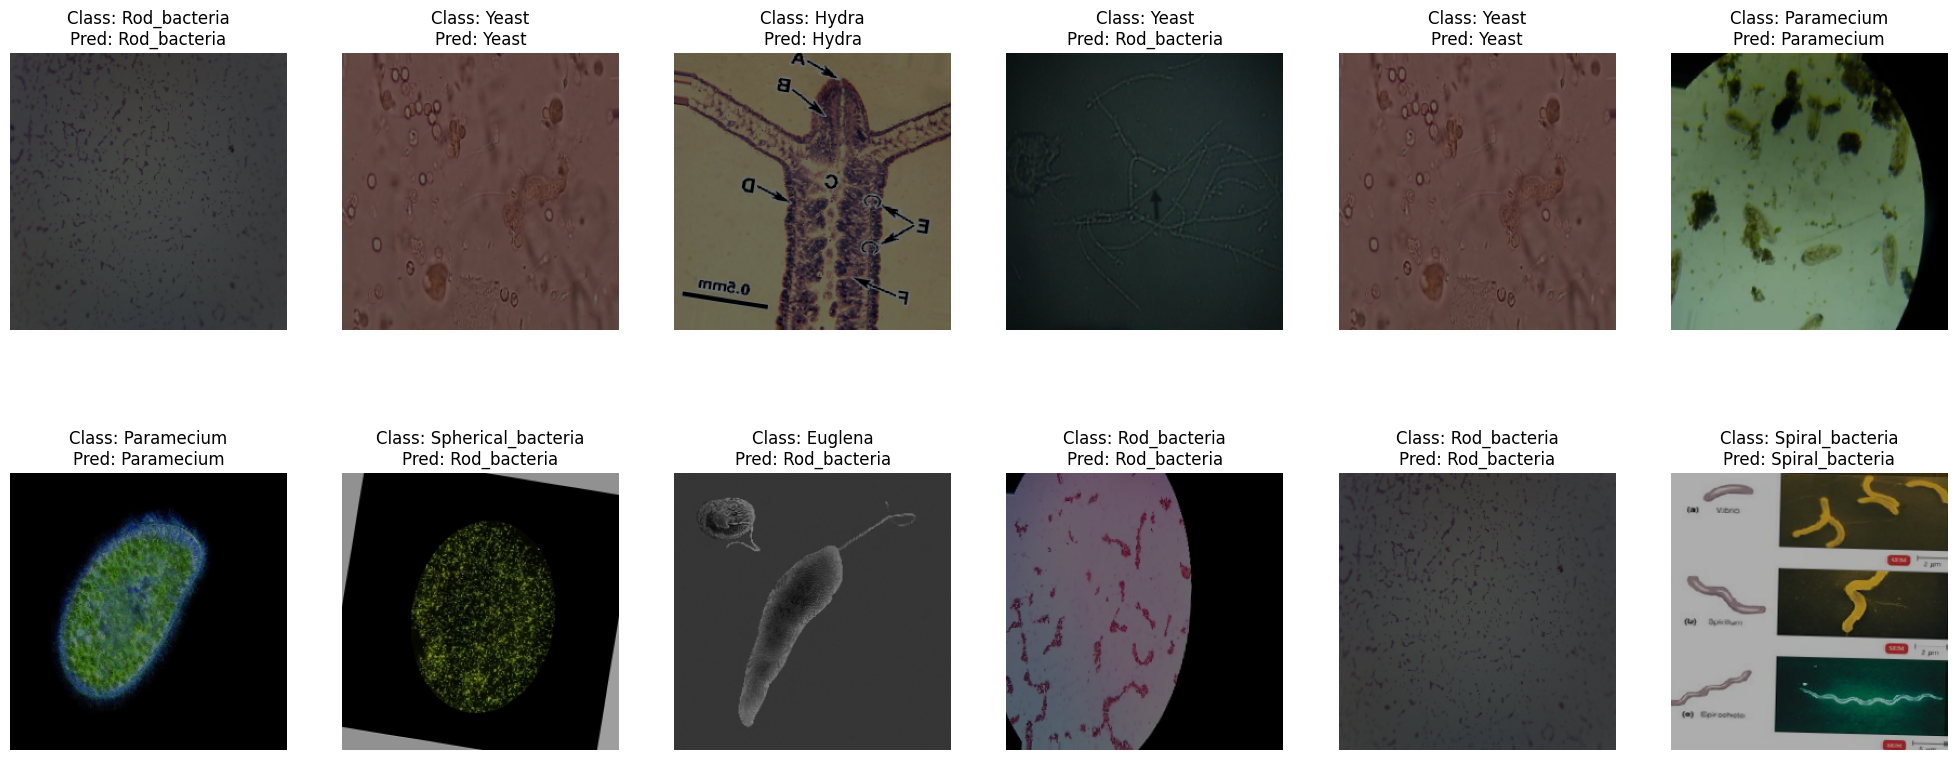

In [ ]:
show_images(data=valid_ds, model=model)

In [ ]:
from tensorflow. keras. preprocessing import image
import numpy as пр

In [ ]:
## Testing 1
# Load the image
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Micro_Organism/Rod bacteria/Image_102.jpg', target_size=(192, 192))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Add a batch dimension

# Make predictions using the model
pred = np.argmax(model.predict(x))
op = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod bacteria', 'Spherical bacteria', 'Spiral bacteria', 'Yeast']

# Ensure pred is within the valid index range of op
pred = pred % len(op)

result = op[pred]
print(result)
